In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


from sklearn.tree import export_graphviz
def plot(dtree):
    export_graphviz(dtree, out_file="tree.dot",  
                filled=True, rounded=True,
                special_characters=True)
    from subprocess import call
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=150'])


In [2]:
import zipfile
with zipfile.ZipFile("Data/creditcard.zip", 'r') as zip_ref:
    zip_ref.extractall("Data")

In [3]:
data=pd.read_csv('Data/creditcard.csv')

In [4]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isna().any() # or data.isnull().sum()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Data is SUPER CLEAN!

<AxesSubplot:title={'center':'Correlation with class'}>

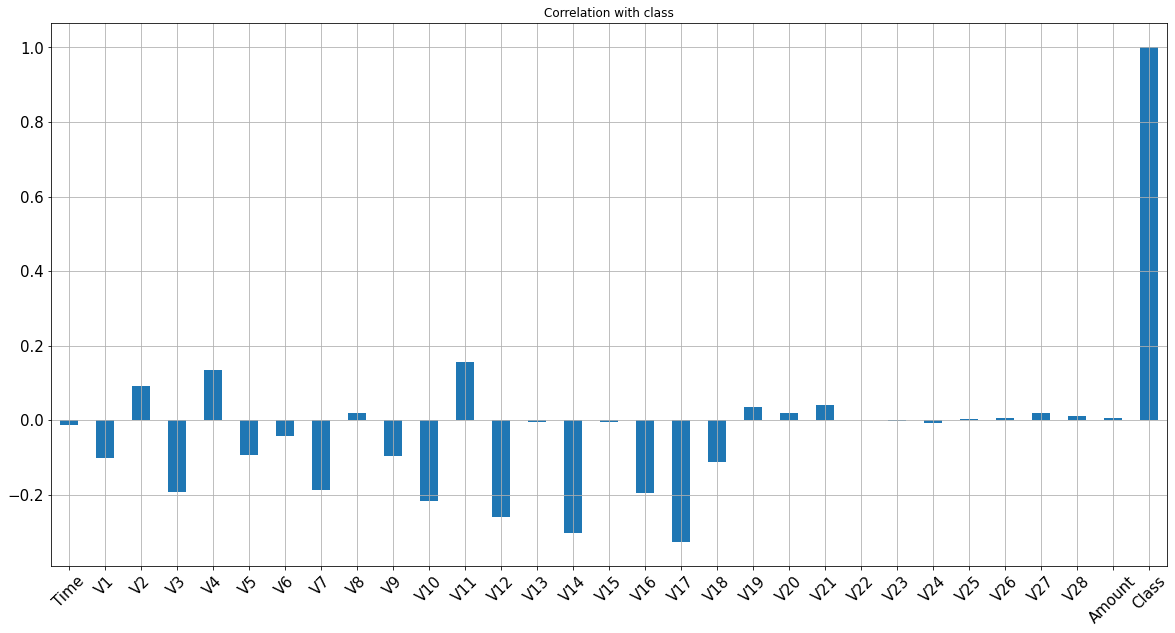

In [7]:
data.corrwith(data.Class).plot.bar(figsize=(20,10), title="Correlation with class", fontsize=15, rot=45, grid=True)

<AxesSubplot:>

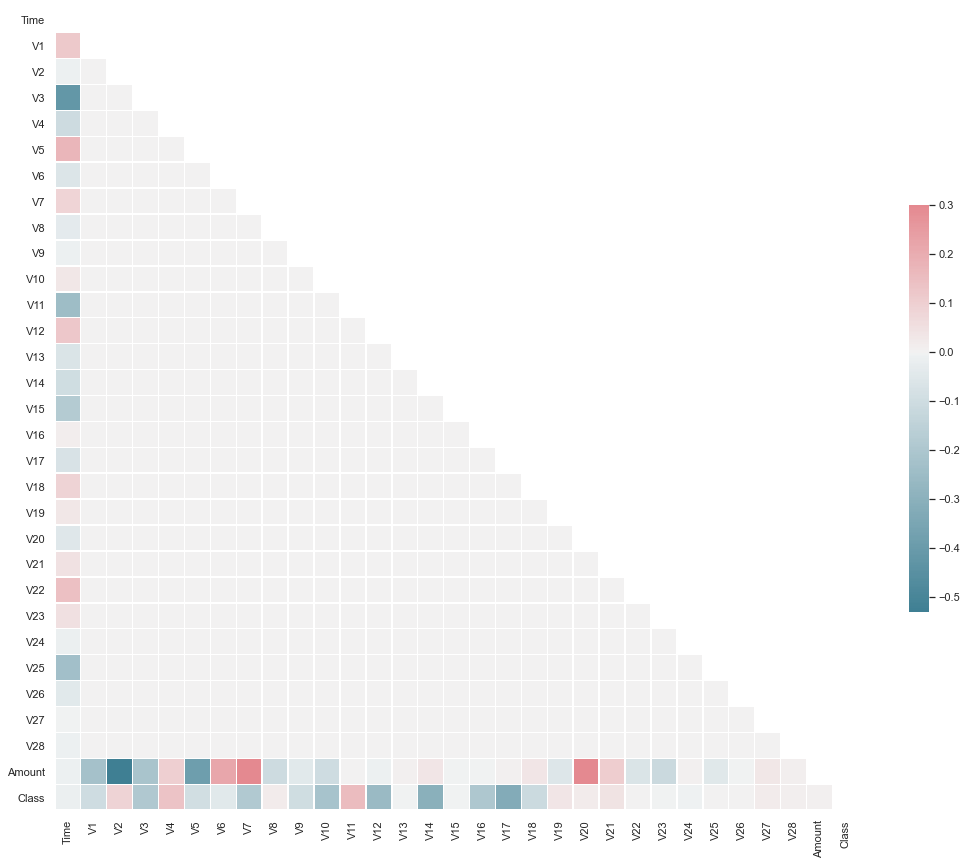

In [8]:
corr=data.corr()
sn.set(style="white")
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Decision Tree

First you need to remove the column `Time` as you will not need it for the rest of this project. 

Build a decision tree classifier and use grid search cross validation to find the best Max num Leaf parameter. Remember to split the data between train and test and not to have data leakage!. Remember also to scale the `Amount` column using the `StandardScaler`

At the end, you need to report the best parameter as well as the `accuracy_score`, `precision_score`, `recall_score`, `f1_score` which are all part of `sklearn.metrics`. 

You will also need to use the `plot` function given to you to plot the Decision Tree. (the function will save it as `png` file. 


In [9]:
from sklearn.preprocessing import StandardScaler
y = data['Class']
X = data.drop(['Class','Time','Amount'],axis=1)

features = data['Amount']
scaler = StandardScaler().fit(features.values.reshape(-1, 1))
features = scaler.transform(features.values.reshape(-1, 1))
X['Amount']=features
print('y :',y.shape,'  |   X :',X.shape)

y : (284807,)   |   X : (284807, 29)


In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X,y,test_size=0.3)

Hyperparameter Tuning

In [12]:
param={'max_leaf_nodes':np.arange(9,20)}

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DtreeCV = GridSearchCV(DecisionTreeClassifier(), param)

In [14]:
DtreeCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [15]:
print("Best number of nodes is :",DtreeCV.best_params_)
print("Best score is :",DtreeCV.best_score_)

Best number of nodes is : {'max_leaf_nodes': 17}
Best score is : 0.9994382129402506


In [16]:
Dtree = DecisionTreeClassifier(max_leaf_nodes=17)
Dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=17)

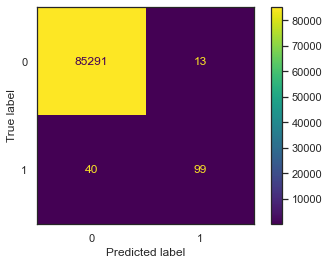

In [17]:
from sklearn.metrics import plot_confusion_matrix
y_predicted=Dtree.predict(X_test1)
plot_confusion_matrix(Dtree, X_test1, y_test1)

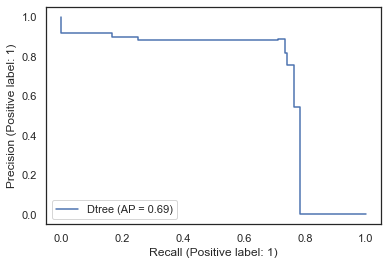

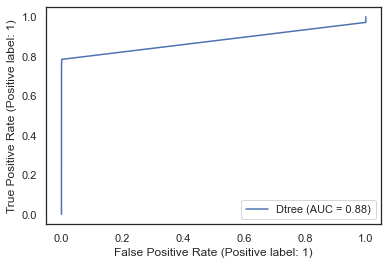

In [18]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(Dtree, X_test1, y_test1, name='Dtree')
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Dtree, X_test1, y_test1, name='Dtree')

In [19]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test1, y_predicted))
print('Precision:', metrics.precision_score(y_test1, y_predicted))
print('Recall:', metrics.recall_score(y_test1, y_predicted))
print('F1 score:', metrics.f1_score(y_test1, y_predicted))
print('\n clasification report:\n', metrics.classification_report(y_test1, y_predicted))

Accuracy: 0.9993797034280163
Precision: 0.8839285714285714
Recall: 0.7122302158273381
F1 score: 0.7888446215139442

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.88      0.71      0.79       139

    accuracy                           1.00     85443
   macro avg       0.94      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



[Text(194.60250000000002, 203.85, 'X[16] <= -2.769\ngini = 0.004\nsamples = 199364\nvalue = [199011, 353]'),
 Text(138.10500000000002, 176.67000000000002, 'X[11] <= -2.181\ngini = 0.35\nsamples = 319\nvalue = [72, 247]'),
 Text(121.36500000000001, 149.49, 'X[25] <= -0.225\ngini = 0.288\nsamples = 298\nvalue = [52, 246]'),
 Text(75.33000000000001, 122.31, 'X[25] <= -0.335\ngini = 0.471\nsamples = 100\nvalue = [38, 62]'),
 Text(33.480000000000004, 95.13, 'X[15] <= -2.098\ngini = 0.162\nsamples = 45\nvalue = [4, 41]'),
 Text(16.740000000000002, 67.94999999999999, 'gini = 0.046\nsamples = 42\nvalue = [1, 41]'),
 Text(50.220000000000006, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(117.18, 95.13, 'X[28] <= 0.027\ngini = 0.472\nsamples = 55\nvalue = [34, 21]'),
 Text(83.70000000000002, 67.94999999999999, 'X[7] <= 0.653\ngini = 0.272\nsamples = 37\nvalue = [31, 6]'),
 Text(66.96000000000001, 40.77000000000001, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(100.440

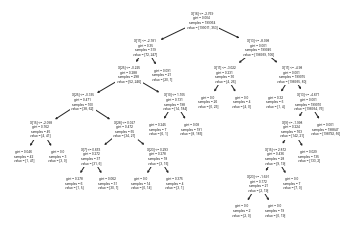

In [20]:
from sklearn.tree import plot_tree
plot_tree(Dtree)

# Random Forest

Repeat the same procedure for `RandomForest` and use GridSearchCV to find the best number of features (MaxFeatures). You need to report the same values as you did for the decision tree and compare results.  


In [21]:
#No need to do it again
from sklearn.preprocessing import StandardScaler
y = data['Class']
X = data.drop(['Class','Time','Amount'],axis=1)

features = data['Amount']
scaler = StandardScaler().fit(features.values.reshape(-1, 1))
features = scaler.transform(features.values.reshape(-1, 1))
X['Amount']=features
print('y :',y.shape,'  |   X :',X.shape)

y : (284807,)   |   X : (284807, 29)


In [22]:
#No need to do it again
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [23]:
#No need to do it again
from sklearn.model_selection import train_test_split
X_train, X_test2, y_train, y_test2 = train_test_split(X,y,test_size=0.3)

Hyperparameter Tuning

In [28]:
param={'max_features':[3,4,5,6]}

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RFCV = GridSearchCV(RandomForestClassifier(), param, cv=2)

In [30]:
RFCV.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_features': [3, 4, 5, 6]})

In [32]:
print("Best number of features is :",RFCV.best_params_)
print("Best score is :",RFCV.best_score_)

Best number of features is : {'max_features': 5}
Best score is : 0.9995836760899661


In [33]:
RF = RandomForestClassifier(max_features=5)
RF.fit(X_train, y_train)

RandomForestClassifier(max_features=5)

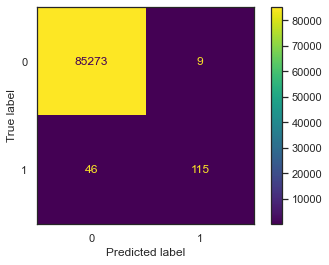

In [34]:
y_predicted=RF.predict(X_test2)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, X_test2, y_test2)

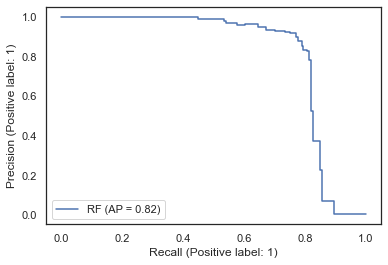

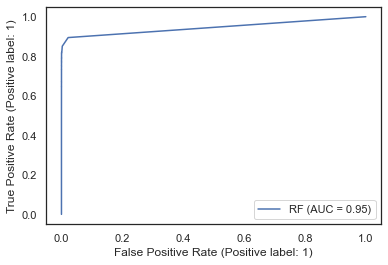

In [35]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(RF, X_test2, y_test2, name='RF')
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RF, X_test2, y_test2, name='RF')

In [36]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test2, y_predicted))
print('Precision:', metrics.precision_score(y_test2, y_predicted))
print('Recall:', metrics.recall_score(y_test2, y_predicted))
print('F1 score:', metrics.f1_score(y_test2, y_predicted))
print('\n clasification report:\n', metrics.classification_report(y_test2, y_predicted))

Accuracy: 0.9993562960102056
Precision: 0.9274193548387096
Recall: 0.7142857142857143
F1 score: 0.8070175438596491

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85282
           1       0.93      0.71      0.81       161

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



# SVM

Repeat the same procedure for `SVM` and use GridSearchCV to find the best Kernel and best corresponding parameter. Here it is better to use a Wild pipeline like the one we used in the slides to iterate through Kernels and their parameters. You need to report the same values as you did for the decision tree and random forest and compare results. 

In [37]:
#No need to do it again
from sklearn.preprocessing import StandardScaler
y = data['Class']
X = data.drop(['Class','Time','Amount'],axis=1)

features = data['Amount']
scaler = StandardScaler().fit(features.values.reshape(-1, 1))
features = scaler.transform(features.values.reshape(-1, 1))
X['Amount']=features
print('y :',y.shape,'  |   X :',X.shape)

y : (284807,)   |   X : (284807, 29)


In [38]:
#No need to do it again
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [39]:
#No need to do it again
from sklearn.model_selection import train_test_split
X_train, X_test3, y_train, y_test3 = train_test_split(X,y,test_size=0.3,random_state=40)

Hyperparameter Tuning

In [40]:
param={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
      'C':np.arange(1,42,10),
      'degree':np.arange(3,6),   
      'coef0':np.arange(0.001,3,0.5),
      'gamma': ('auto', 'scale')}

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVCCV = GridSearchCV(SVC(), param, cv=5)

In [ ]:
SVCCV.fit(X_train, y_train)

In [ ]:
print("The best parameters are :",SVCCV.best_params_)
print("Best score is :",SVCCV.best_score_)

You fit SVCCV to the traning data then get the best hyperparameters from the previous cell, but this takes time and I do not want to wait a few hours for it so I chose random values to continue and sorry for not waiting to get the precise result :)

In [42]:
SVC = SVC(kernel='rbf',C=31,degree=4,coef0=1.001,gamma='auto')
SVC.fit(X_train, y_train)

SVC(C=31, coef0=1.001, degree=4, gamma='auto')

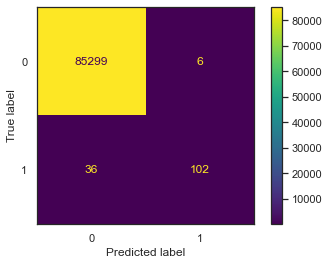

In [43]:
y_predicted=RF.predict(X_test3)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVC, X_test3, y_test3)

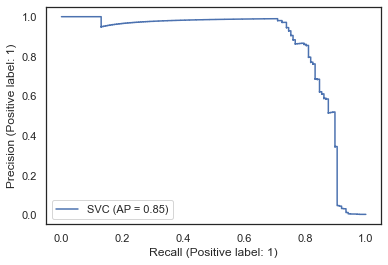

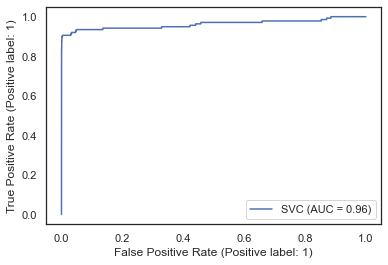

In [44]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(SVC, X_test3, y_test3, name='SVC')
from sklearn.metrics import plot_roc_curve
plot_roc_curve(SVC, X_test3, y_test3, name='SVC')

In [45]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test3, y_predicted))
print('Precision:', metrics.precision_score(y_test3, y_predicted))
print('Recall:', metrics.recall_score(y_test3, y_predicted))
print('F1 score:', metrics.f1_score(y_test3, y_predicted))
print('\n clasification report:\n', metrics.classification_report(y_test3, y_predicted))

Accuracy: 0.9998361480753251
Precision: 0.9769230769230769
Recall: 0.9202898550724637
F1 score: 0.9477611940298507

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.98      0.92      0.95       138

    accuracy                           1.00     85443
   macro avg       0.99      0.96      0.97     85443
weighted avg       1.00      1.00      1.00     85443



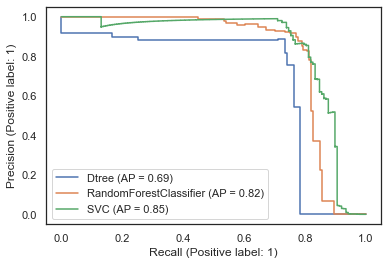

In [46]:
pr_DTREE = plot_precision_recall_curve(Dtree, X_test1, y_test1, name='Dtree')
pr_RF = plot_precision_recall_curve(RF, X_test2, y_test2, ax=plt.gca())
pr_SVC = plot_precision_recall_curve(SVC, X_test3, y_test3, ax=plt.gca())


According to the graph, the Decision Tree has the lowest area under the curve, while SVC is the best barely beating RF Classifier

# Final Comparison : Decision Tree < Random Forest < SVM

precision = true positive / (true positive + false positive)<br>
recall = true positive / (true positive + false negative)<br>
F1 = 2 * (precision * recall) / (precision + recall)

Best precision for <b>Decision Tree</b> on the test set = 0.8839285714285714 <br>
Best Recall for <b>Decision Tree</b> on the test set = 0.7122302158273381    <br>
Best F1 score for <b>Decision Tree</b> on the test set = 0.7888446215139442   

Best precision for <b>Random Forest</b> on the test set = 0.9274193548387096  <br>
Best Recall for <b>Random Forest</b> on the test set = 0.7142857142857143    <br>
Best F1 score for <b>Random Forest</b> on the test set = 0.8070175438596491    

Best precision for <b>SVM</b> on the test set = 0.9769230769230769            <br>
Best Recall for <b>SVM</b> on the test set = 0.9202898550724637              <br>
Best F1 score for <b>SVM</b> on the test set = 0.9477611940298507              

SVM Classifier has a way better recall than the other two but takes much more time for hyperparameter tuning than the others

# SVM Classifier the most accurate algorithm!
# Random Forest  Classifier the fastest algorithm with a good accuracy!